<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Neuron_Artificial_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neuronas Lineales Adpatativas (AdaLiNe)

A diferencia del perceptron presentado en la sección [Algoritmo de aprendizaje del Perceptron](https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Neuron_Artificial.ipynb), las redes lineales adaptativas (Figura 1), utilizan una funcion de activación lineal para comparar las etiquetas verdaderas con la salida de valores continuos de la función de activación lineal para calcular el errod del modelo en lugar de coparar las etiquetas verdaderas con los resultados predichos como en el caso del perceptron. 

In [0]:
#importar imagenes desde archivos locales
from google.colab import files
from IPython.display import Image

upload = files.upload()

Saving Adaline.png to Adaline.png


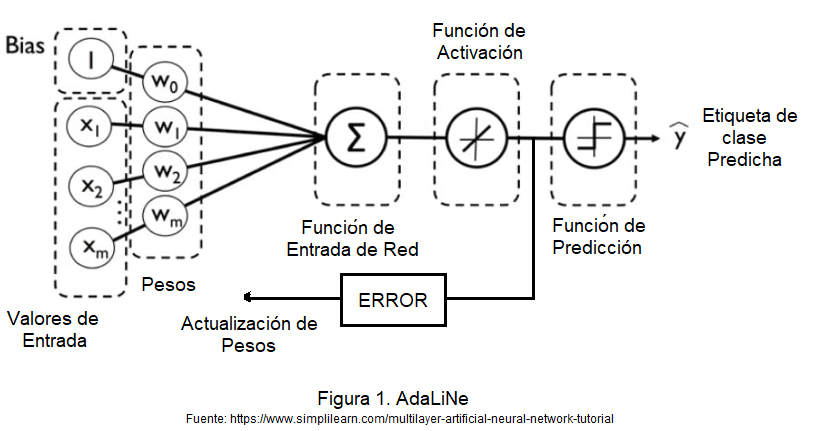

In [0]:
Image('Adaline.png',width=1000)

Esta nueva función de activación lineal se utliza para aprender los pesos y no es mas que un función de identificación de la entrada de red

$\phi(W^{T}X) = W^{T}X$




#Regla de Aprendizaje

Con la adición de esta nueva funcion en la estructura del neurón artificial, se inr¡troduce un nuevo concepto para calcular los errores y actualizar los pesos de la neurona llamado **funcion de coste** que en el caso adeline esta representada por la **Suma de Errores Cuadrados** entre la salida calculada y las etiquetas de clase verdaderas:

*J*(W) = $\frac{1}{2}\sum_{i}(y^{i}-\phi(z^{i}))^{2}$

Como esta funciòn de coste es diferenciable y convexa, se puede utiñizar un potente algoritmo de optimización denominado **Descenso del Gradiente** el cual encontrara los pesos que minimice la funcion de coste.

Para calcular el gradiente de la función de coste se calcula la derivada parcial de la funcion de coste con respecto a cada peso

$\frac{\partial J}{\partial W_{j}} = \sum_{i}(y^{i}-\phi(z^{i}))X_{j}^{i} $

De esta forma aplicando la actualizacion de pesos y la matematica correspondiente a nuestra adeline la regla de aprendizaje Adeline queda definida como 

$W = W + \Delta W$

donde $\Delta W$ se define como el gradiente negativo multiplicado por la tasa de aprendizaje

$\Delta W_{j} = -\eta \sum_{i}(y^{i}-\phi(z^{i}))X_{j}^{i}$

#AdaLiNe en Python

In [0]:
import numpy as np

class Adaline(object):

  def __init__(self, tasa_aprendizaje=0.01, numero_iteraciones=50, semilla=1):
    self.tasa_aprendizaje = tasa_aprendizaje
    self.numero_iteraciones = numero_iteraciones
    self.semilla=semilla

  def alg_aprendizaje(self,X,Y):
    #inicializacion de pesos
    sem=np.random.RandomState(self.semilla)
    self.pesos=sem.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
    self.cost=[]
    #ajuste de pesos
    for i in range(self.numero_iteraciones):
      entrada = self.entrada_red(X)
      salida = self.funcion_activacion(entrada)
      errores = (Y-salida)
      self.pesos[1:] += self.tasa_aprendizaje* X.T.dot(errores)
      self.pesos[0] += self.tasa_aprendizaje * errores.sum()
      cost = (errores**2).sum()/2.0
      self.cost.append(cost)
    return self

  def funcion_activacion(self,X):
    # como la funcion de activacion es lineal (una funcion identidad) su valor no repercute en el codigo
    return X

  def entrada_red(self,X):
    #calcular el valores entre las entradas y los pesos 
    return np.dot(X,self.pesos[1:])+self.pesos[0]

  def clasificador(self,X):
    # clasificacion mediante funcion escalon unitario
    return np.where(self.funcion_activacion(self.entrada_red(X))>=0.0,-1,1)


#Cargando dataset de entrenamiento Iris

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets 

iris = datasets.load_iris() #imortamos el dataset Iris
iris_df=pd.DataFrame(iris.data)  # lo convertimos a un dataframe con pandas
iris_df['class']=iris['target'] # creamos la columna que define las clases de cada flor
iris_df['class']=iris_df['class'].apply(lambda x: iris['target_names'][x])
iris_df.tail()  # mostramos los ultimos registros para ver si todo esta correcto

#se seleccionan dos clases de flores del conjunto Iris las setosas y las versicolor y las clasificaremos como -1 y 1 respectivamente
y=iris_df.iloc[0:100,4]
y=np.where( y == 'setosa',-1,1)

# seleccionamos las caracteristicas de longitud de sepalo y longitud de petalo correspondientes a las columnas 0 y 2 del dataframes Iris
X = iris_df.iloc[0:100,[0,2]].values     # se usa values para retornar un array

Con nuestra clase Adeline creada se puede crear un objeto adaline para verificar como influye la tasa de aprendizaje en la convergencia del método

la suma de errores cuadraticos o funcion de coste es 3.933427172542227
la suma de errores cuadraticos o funcion de coste es 3.886339823208034
la suma de errores cuadraticos o funcion de coste es 3.855741913529898
la suma de errores cuadraticos o funcion de coste es 3.831270079832912
la suma de errores cuadraticos o funcion de coste es 3.809049849423634
la suma de errores cuadraticos o funcion de coste es 3.7876633228971133
la suma de errores cuadraticos o funcion de coste es 3.7665958435710136
la suma de errores cuadraticos o funcion de coste es 3.7456613555092084
la suma de errores cuadraticos o funcion de coste es 3.7247928905681946
la suma de errores cuadraticos o funcion de coste es 3.7039665817697145


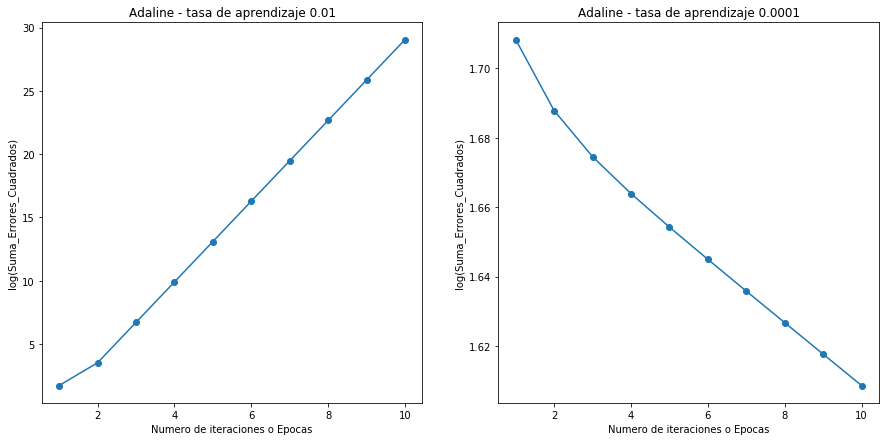

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7)) # crear la grilla de plots

#instancia Adaline con tasa de aprendizaje 0.01
adl_1 = Adaline(tasa_aprendizaje=0.01,numero_iteraciones=10).alg_aprendizaje(X,y)
ax[0].plot(range(1,len(adl_1.cost) + 1),np.log10(adl_1.cost),marker='o')
ax[0].set_xlabel('Numero de iteraciones o Epocas')
ax[0].set_ylabel('log(Suma_Errores_Cuadrados)')
ax[0].set_title('Adaline - tasa de aprendizaje 0.01')

#instancia Adaline con tasa de aprendizaje 0.0001
adl_2 = Adaline(tasa_aprendizaje=0.0001,numero_iteraciones=10).alg_aprendizaje(X,y)
ax[1].plot(range(1,len(adl_2.cost) + 1),np.log10(adl_2.cost),marker='o')
ax[1].set_xlabel('Numero de iteraciones o Epocas')
ax[1].set_ylabel('log(Suma_Errores_Cuadrados)')
ax[1].set_title('Adaline - tasa de aprendizaje 0.0001')

for i in adl_2.cost:
  print("la suma de errores cuadraticos o funcion de coste es {}".format(np.log(i)))

Como se puede observar en las figuras cuando la tasa de aprendizaje es alta (0.01) el algoritmo de aprendizaje nunca converge ya que no llegara al minimo local. Por otro lado si la tasa de parendizaje es baja (0.0001) el algoritmo converge con el incoveniente de requerir muchas iteraciones para poder minimizar los errores

#Escalado de caracteristicas
Una forma de optimizar la convergencia  del algoritmo de aprendizaje y que la funcion de coste encuentre mas rapido el minimo global es escalando las caracteristicas o atributos de nuestro dataset.
Una de las técnicas mas comunes de escalado es la **normalización**, la cual proporciona al dataset la propiedad de una distribución normal estandar, cambiando la media y la desviación estandar de cada conjunto de caracteristicas de nuestro dataset. La normalización viene dada por:

$X'_{j} = \frac{x_{j}-\mu_{j}}{\sigma_{j}}$

donde $X_{j}$ representa un vector con las caracteristicas *j* de todas las muestras de entrenamiento

In [0]:
#normalización del dataset
x_nor =np.copy(X)
x_nor[:,0] = (x_nor[:,0] - x_nor[:,0].mean()) /x_nor[:,0].std()
x_nor[:,1] = (x_nor[:,1] - x_nor[:,1].mean()) /x_nor[:,1].std()

Volvemos a crear una instancia Adaline con los datos normalizados

la suma de errores cuadraticos o funcion de coste es 3.9313733992684825
la suma de errores cuadraticos o funcion de coste es 3.5399904737855423
la suma de errores cuadraticos o funcion de coste es 3.1602724616910645
la suma de errores cuadraticos o funcion de coste es 2.796607069628407
la suma de errores cuadraticos o funcion de coste es 2.454807062838669
la suma de errores cuadraticos o funcion de coste es 2.1415038814765133
la suma de errores cuadraticos o funcion de coste es 1.8632833328592806
la suma de errores cuadraticos o funcion de coste es 1.625354422466335
la suma de errores cuadraticos o funcion de coste es 1.4301760313027931
la suma de errores cuadraticos o funcion de coste es 1.2767133044843206
la suma de errores cuadraticos o funcion de coste es 1.1607579570952478
la suma de errores cuadraticos o funcion de coste es 1.0761201573664942
la suma de errores cuadraticos o funcion de coste es 1.0160507795406495
la suma de errores cuadraticos o funcion de coste es 0.974326110903

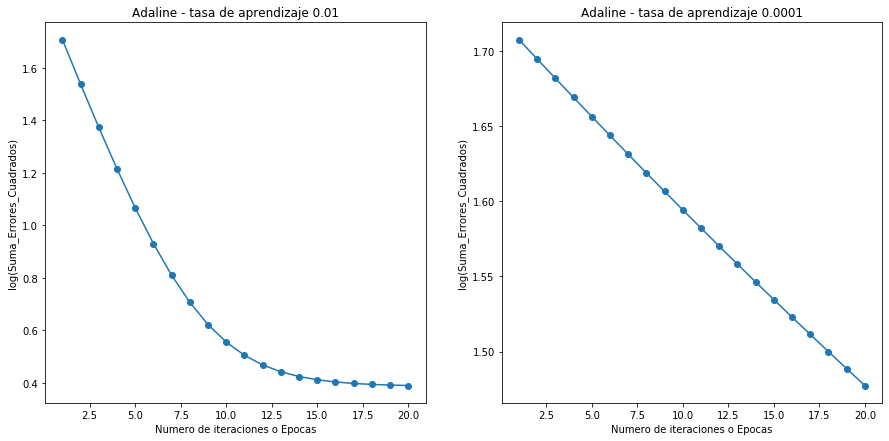

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7)) # crear la grilla de plots

#instancia Adaline con tasa de aprendizaje 0.01
adl_nor1 = Adaline(tasa_aprendizaje=0.01,numero_iteraciones=20).alg_aprendizaje(x_nor,y)
ax[0].plot(range(1,len(adl_nor1.cost) + 1),np.log10(adl_nor1.cost),marker='o')
ax[0].set_xlabel('Numero de iteraciones o Epocas')
ax[0].set_ylabel('log(Suma_Errores_Cuadrados)')
ax[0].set_title('Adaline - tasa de aprendizaje 0.01')

#instancia Adaline con tasa de aprendizaje 0.0001
adl_nor2 = Adaline(tasa_aprendizaje=0.0001,numero_iteraciones=20).alg_aprendizaje(x_nor,y)
ax[1].plot(range(1,len(adl_nor2.cost) + 1),np.log10(adl_nor2.cost),marker='o')
ax[1].set_xlabel('Numero de iteraciones o Epocas')
ax[1].set_ylabel('log(Suma_Errores_Cuadrados)')
ax[1].set_title('Adaline - tasa de aprendizaje 0.0001')

for i in adl_nor1.cost:
  print("la suma de errores cuadraticos o funcion de coste es {}".format(np.log(i)))

Se puede observar como escalando las caracteristicas de nuestro dataset la funcion de coste se minimiza y converge tanto en alto como en baja tasa de aprendizaje, esto se debe a que el optimizador tiene que realizar menos pasos para encontrar una optima solucion al minimo global